У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи pandas.DataFrame. Це дозволяє будувати візуалізації ще швидше.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`.  Завантажте дані з файла yulu_rental.csv у pandas.DataFrame df.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
os.listdir()
os.listdir('/Users/karinashport/Desktop/data/')
data_path = '/Users/karinashport/Desktop/data/yulu_rental.csv'
df = pd.read_csv(data_path)

1.1. Користуючись групою методів `pandas.plot` побудуйте гістограму кількості зареєстрованих користувачів з налаштуваннями за замовченням (тобто без жодних додаткових параметрів).

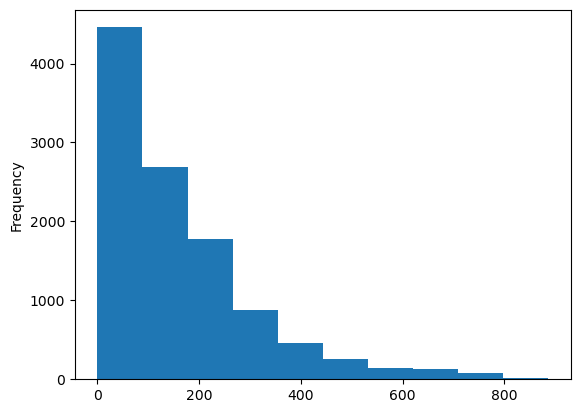

In [50]:
df['registered'].plot.hist();

1.2. Побудуйте гістограму для цього ж показника, але задайте кількість бінів рівну 30 і задайте прозорість 0.5. Додайте підписи за осями ОХ і ОУ, а також назву дівграмі. Опишіть свої спостереження. Що бачите? Чому дані можуть мати такий розподіл?

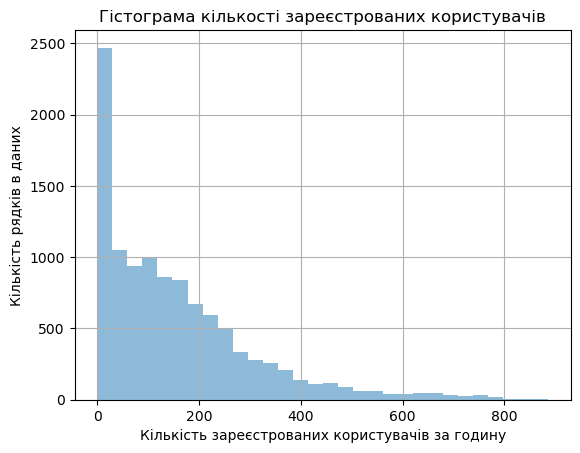

In [12]:
plt.hist(df['registered'], bins=30, alpha=0.5)
plt.grid()
plt.title('Гістограма кількості зареєстрованих користувачів')
plt.xlabel('Кількість зареєстрованих користувачів за годину')
plt.ylabel('Кількість рядків в даних')
plt.show();

Переважна більшість значень реєстрацій знаходиться в діапазоні від 0 до 200 користувачів за годину, а кількість рядків з більшими значеннями швидко зменшується. Якщо я правильно зрозуміла дані, то ми бачимо, що найбільший ріст реєстрацій відбувся у перші години роботи сервісу після запуску. 

Кількість випадків з більш ніж 500 зареєстрованими користувачами за годину є дуже низькою, і таких випадків дуже мало. Це може свідчити про те, що піки реєстрацій є рідкісними та відбуваються лише в певні години або дні з високим попитом.

Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.

In [13]:
df['datetime'] = pd.to_datetime(df.datetime)

І створимо нову колонку `dayofweek` для того, аби дослідити детальніше, коли у нас немає поїздок.

In [14]:
df['dayofweek'] = df.datetime.dt.day_of_week

Переглянемо значення в колонкці. Колонка dayofweek містить числа від 0 до 6 включно, де 0 відповідає понеділку.

In [15]:
df[['datetime','dayofweek']][df.dayofweek==0].head()

,datetime,dayofweek
47,2011-01-03 00:00:00,0
48,2011-01-03 01:00:00,0
49,2011-01-03 04:00:00,0
50,2011-01-03 05:00:00,0
51,2011-01-03 06:00:00,0


2. Проведемо аналіз нульової активності зареєстрованих користувачів за днями тижня. Для цього
  1. Виберіть з набору даних усі записи, де кількість зареєстрованих користувачів дорівнює 0. Групуйте ці записи за днями тижня (`dayofweek`) та обчисліть кількість нульових записів для кожного дня.
  2. Після групування, використайте графік типу "bar" для візуалізації результатів. Кожна смужка на графіку має відображати кількість записів у даних для цього дня тижня, коли не було зареєстровано жодної поїздки користувачами.

In [65]:
zero_registered = df[df['registered'] == 0].groupby('dayofweek').size()
zero_registered

dayofweek
0    5
1    3
2    2
3    1
4    1
5    1
6    2
dtype: int64

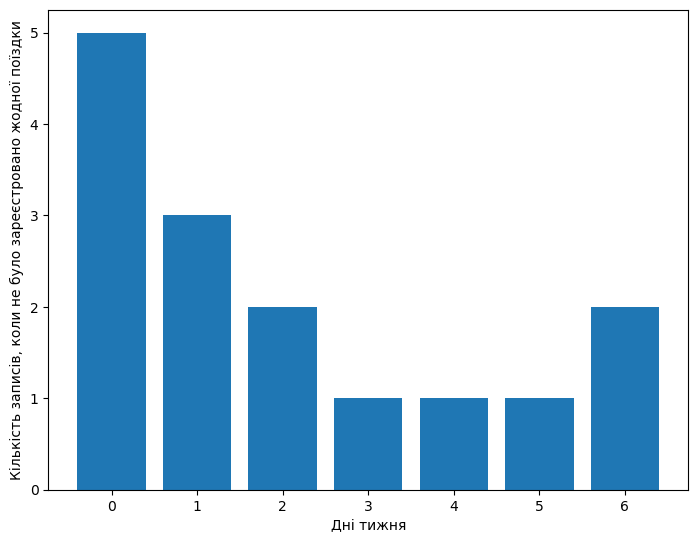

In [75]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(zero_registered.index, zero_registered.values)
ax.set_xlabel('Дні тижня')
ax.set_ylabel('Кількість записів, коли не було зареєстровано жодної поїздки');

3. Проведемо аналіз загальної кількості зареєстрованих покристувачів за різними погодними умовами.
Згрупуйте всі дані за погодними умовами і визначте суму кількості зареєстрованих користувачів для кожної погодньої умови.
Побудуйте стовпачасту діаграму, які відобразить результат обчислень.
Зверніться до опису даних та дайте відповідь: чи побудована візуалізація має логічний сенс з точки зору опису даних.

In [54]:
weather_registered = df.groupby('weather')['registered'].sum()
print(weather_registered)

weather
1    1186163
2     419914
3      87106
4        158
Name: registered, dtype: int64


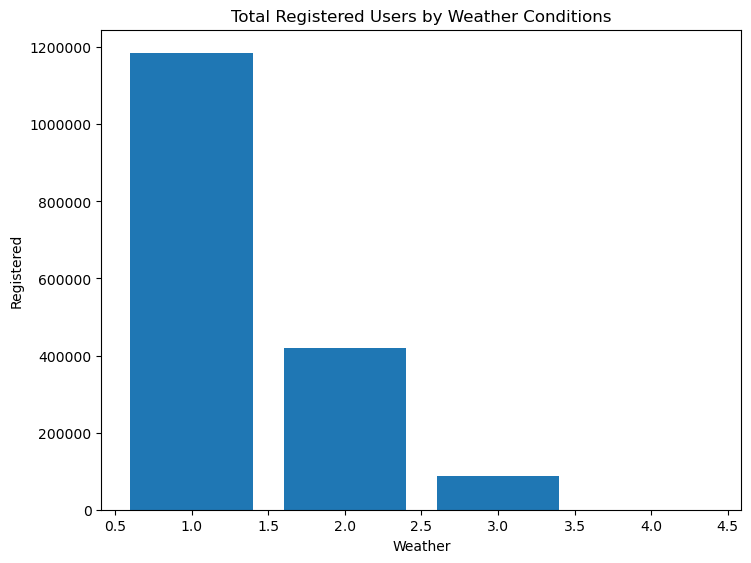

In [74]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(weather_registered.index, weather_registered.values)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Weather')
plt.ylabel('Registered')
plt.title('Total Registered Users by Weather Conditions');

Значення 1 - це ясно, мало хмарно, частково хмарно. 
Значення 2 - це туман + хмарно, туман + розірвані хмари, туман + мало хмарно, туман. 
Значення 3 - легкий сніг, легкий дощ + гроза + розсіяні хмари, легкий дощ + розсіяні хмари.

Дані мають сенс, адже логічно, що чим гірші погодні умови, тим менше користувачів будуть бажати скористатися велосипедами. 

4. Користуючись групою методів pandas.plot побудуйте діаграму розсіювання (scatter plot) між вологістю і кількістю зареєстрованих користувачів. Встановіть прозорість на 0.5, а також налаштуйте діаграму так, аби колір кожної точки відповідав значенню температури за відчуттями (`atemp`).

Проаналізуйте графік, що спостерігаєте?

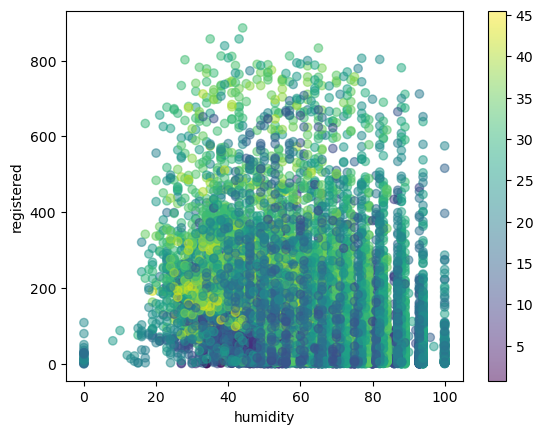

In [89]:
plt.scatter(df['humidity'], df['registered'], c=df['atemp'], cmap='viridis', alpha=0.5)
plt.xlabel('humidity')
plt.ylabel('registered')
plt.colorbar();
plt.show()

На графіку видно, що користувачі реєструються як при високих, так і при низьких рівнях вологості. Проте помітно, що при більш високих температурах кількість зареєстрованих користувачів трохи менша, особливо при високій вологості. 

Більшість реєстрацій все ж таки в середньому діапазоні вологості (40-80%). Ймовірвно, вологість у цьому діапазоні є комфортною для місцевих користувачів. Або це означає що такі середні погодні умови в регіоні.